# Homework 3 - Ames Housing Dataset

For all parts below, answer all parts as shown in the Google document for Homework 3. Be sure to include both code that justifies your answer as well as text to answer the questions. We also ask that code be commented to make it easier to follow.

## Part 1 - Pairwise Correlations

In [1]:
# TODO: show visualization

Discuss most positive and negative correlations.

In [2]:
import pandas as pd
# import the seaborn module
import seaborn as sns
# import the matplotlib module
import matplotlib.pyplot as plt
import datetime  
import numpy as np
from matplotlib.ticker import PercentFormatter
import os
import missingno as msno # visualize the distribution of NaN values
import dexplot as dxp
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [532]:
#reading the file train
train= pd.read_csv("train.csv")
#reading the file test
test= pd.read_csv('test.csv')


In [533]:
print(train.columns)
print(train.shape)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### EDA: For the first level analysis let's take the below 4 categorical features which captures internal and external quality

In [534]:
categ_cols= ['ExterQual', 'KitchenQual','ExterCond','HeatingQC']

### Let's do the label encoding of the above categorical features

In [535]:
label_dict = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}

train['ExterQual'].replace(label_dict, inplace=True)
train['KitchenQual'].replace(label_dict, inplace=True)
train['ExterCond'].replace(label_dict, inplace=True)
train['HeatingQC'].replace(label_dict, inplace=True)

train['ExterQual'] = pd.to_numeric(train['ExterQual'])
train['KitchenQual']= pd.to_numeric(train['KitchenQual'])
train['ExterCond']= pd.to_numeric(train['ExterCond'])
train['HeatingQC']= pd.to_numeric(train['HeatingQC'])

In [635]:
test['ExterQual'].replace(label_dict, inplace=True)
test['KitchenQual'].replace(label_dict, inplace=True)
test['ExterCond'].replace(label_dict, inplace=True)
test['HeatingQC'].replace(label_dict, inplace=True)

test['ExterQual'] = pd.to_numeric(test['ExterQual'])
test['KitchenQual']= pd.to_numeric(test['KitchenQual'])
test['ExterCond']= pd.to_numeric(test['ExterCond'])
test['HeatingQC']= pd.to_numeric(test['HeatingQC'])


# Checking Correlation Matrix of the Variables in Training Set to determine numerical variables

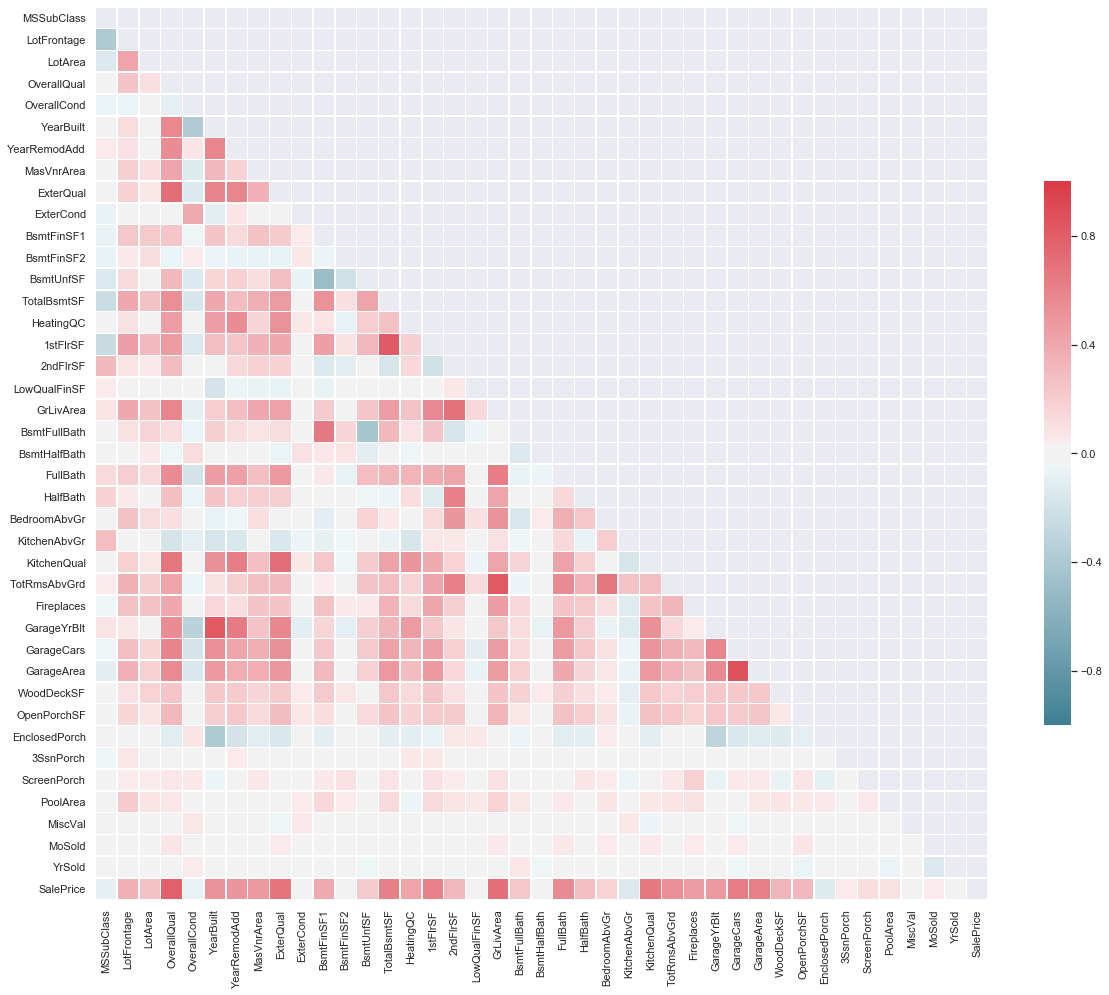

In [539]:
# Compute the correlation matrix

corr = (train.drop(['Id'], axis=1)).corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},vmax=1,vmin= -1)


**Visualizing above Correlation Matrix, few varibales that catch attention are 'OverallQual', 'GrLiveArea', 'GarageArea','GarageCars', '1stFlrSF', TotalBsmtSF, 'ExterQual', 'KitchenQual','ExterCond','HeatingQC' as they have a high positive corrrelation with the Sale Price**

**Let's explore further pairwise highly -vely & -vely correlated features with below code**

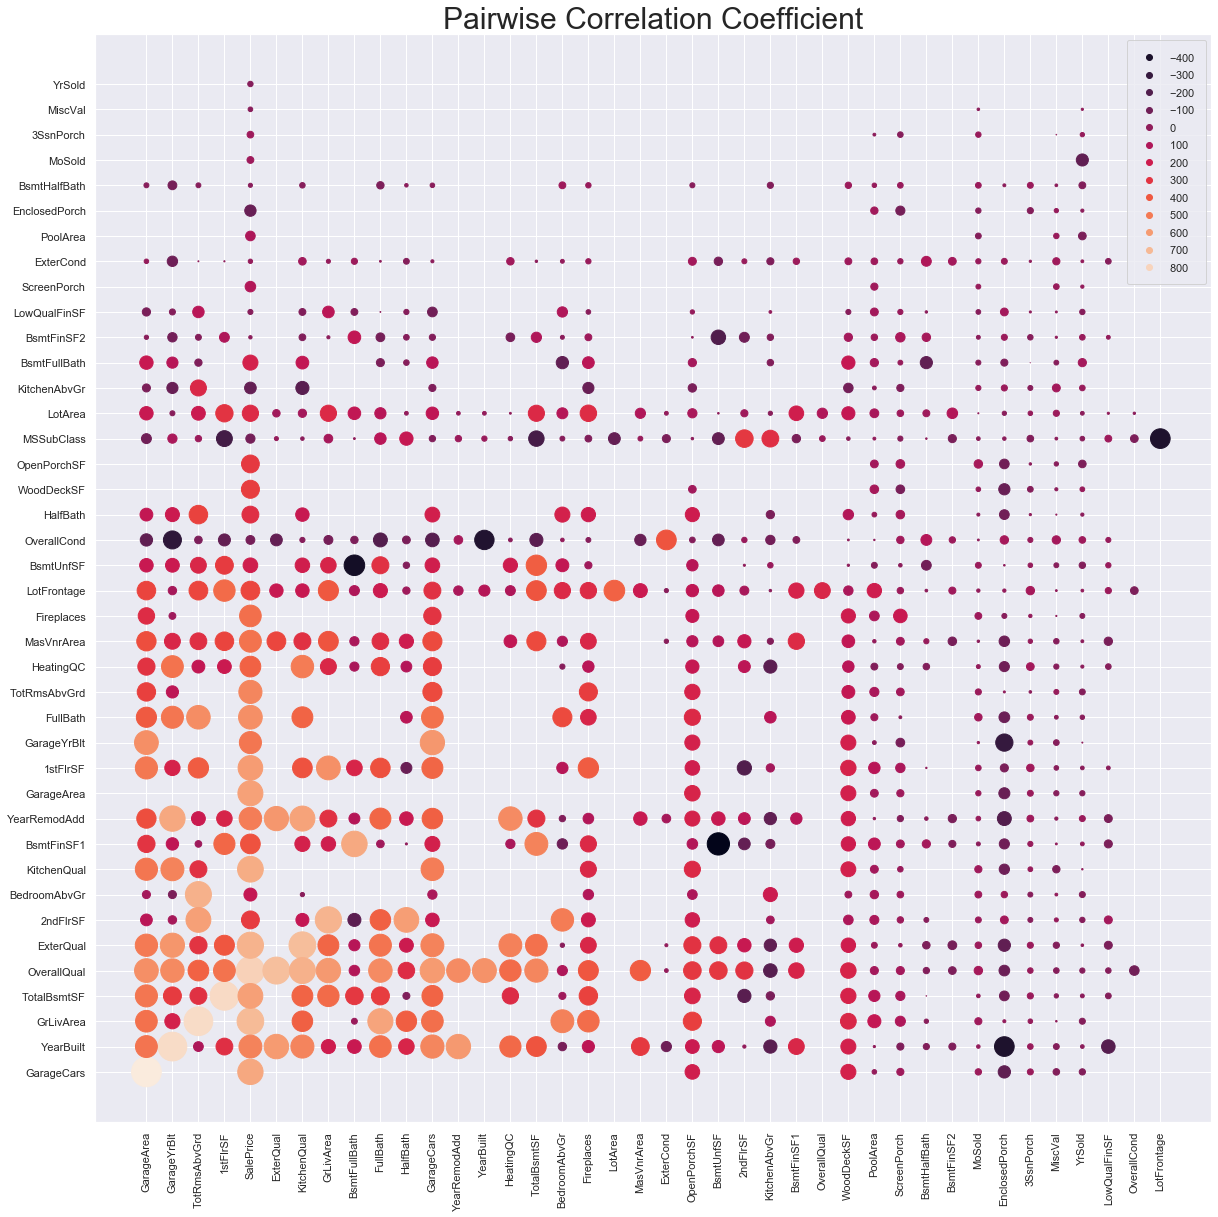

In [540]:
parwise_corr = (train.drop(['Id'], axis=1)).corr()

parwise_corr = parwise_corr.where(np.triu(np.ones(parwise_corr.shape), k=1).astype(np.bool))
parwise_corr = parwise_corr.unstack().transpose().sort_values(ascending=False).dropna()
parwise_corr= pd.DataFrame(parwise_corr)
parwise_corr=parwise_corr.reset_index()
parwise_corr.columns = ['Feature1','Feature2', 'Correlation_Coefficient']

scale =1000
pc = [scale* corr_coeff for corr_coeff in parwise_corr['Correlation_Coefficient']]
pc_abs= np.abs(pc)
re_pc= [ corr_coeff for corr_coeff in parwise_corr['Correlation_Coefficient']]

fig, ax = plt.subplots(figsize=(20,20))
sc=ax.scatter(parwise_corr['Feature1'], parwise_corr['Feature2'], marker = 'o', s = pc_abs,c=pc)
ax.legend(*sc.legend_elements(),borderpad=1,loc='upper right')
plt.title('Pairwise Correlation Coefficient',fontsize= 30)
plt.tick_params(axis ='x', rotation = 90) 


# for area in re_pc:
#     ax.scatter([], [], c='k', s=1,
#                 label=str(area))
# ax.legend(scatterpoints=1, frameon=False, labelspacing=1, title='Correlation Coefficient Quantum')

plt.show()

**In the above plot most -ve correlated are represented by dark circles and most postive correlated circles are represented by orange circles, the area of circles tells us about the magnitude of the correlation**

In [541]:
print('\033[1m' + 'Top 10 Postive Correlated Features are:')
print(parwise_corr.head(10).to_string(index=False))
print('')
print('\033[1m' + 'Top 10 Negative Correlated Features are:')
print( parwise_corr.tail(10).sort_values(by=['Correlation_Coefficient']).to_string(index=False))

Top 10 Postive Correlated Features are:
     Feature1     Feature2  Correlation_Coefficient
   GarageArea   GarageCars                 0.882475
  GarageYrBlt    YearBuilt                 0.825667
 TotRmsAbvGrd    GrLivArea                 0.825489
     1stFlrSF  TotalBsmtSF                 0.819530
    SalePrice  OverallQual                 0.790982
    ExterQual  OverallQual                 0.726278
  KitchenQual    ExterQual                 0.716122
    SalePrice    GrLivArea                 0.708624
    GrLivArea     2ndFlrSF                 0.687501
    SalePrice    ExterQual                 0.682639

Top 10 Negative Correlated Features are:
      Feature1     Feature2  Correlation_Coefficient
     BsmtUnfSF   BsmtFinSF1                -0.495251
  BsmtFullBath    BsmtUnfSF                -0.422900
 EnclosedPorch    YearBuilt                -0.387268
   LotFrontage   MSSubClass                -0.386347
     YearBuilt  OverallCond                -0.375983
   GarageYrBlt  OverallCond 

**Amongst the most Postive Pairwise Correlated Features:**
We observe that **'GarageArea'** and **'GarageCars'** have the highest correlation of 0.88

**Amongst the most Negative Pairwise Correlated Features:** <br>
We observe that **'BsmtUnfSF'** and **'BsmtFinSF1'** have the highest correlation of -0.495

**Observation from the Pairwise most correlated Features**

**'OverallQual', 'GrLivArea' and 'TotalBsmtSF'** are strongly correlated with 'SalePrice' <br>
**'GarageCars' and 'GarageArea'** are highly correlated variables. We can keep 'GarageCars' since its correlation with 'SalePrice' is higher <br>
**'TotalBsmtSF' and '1stFloor'** also seem to be  highly correlated variables. We can keep 'TotalBsmtSF' <br>
**'TotRmsAbvGrd' and 'GrLivArea'**, are highly correlated variables, can keep GrLivArea <br>

**'GarageYrBlt' and 'YearBuilt'** also seem to be  highly correlated variables. We can keep 'YearBuilt'<br>
**KitchenQual** has a high correlation<br>
**'FullBath' is also an important feature** <br>


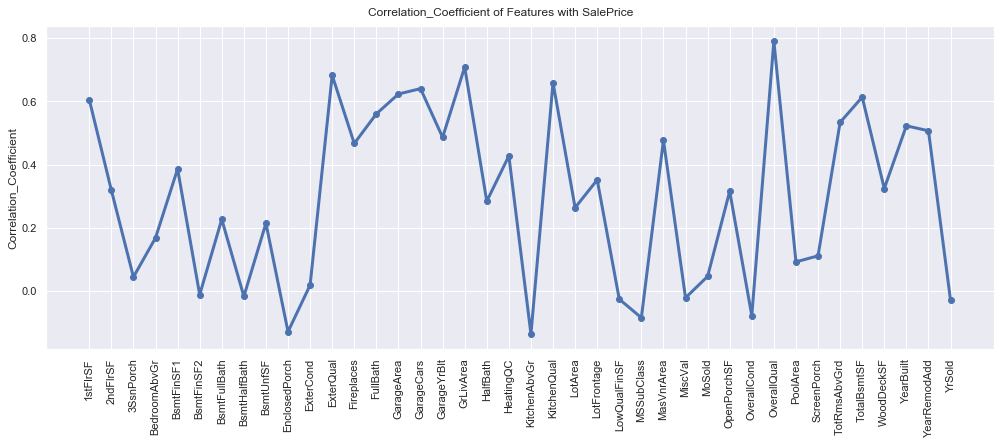

In [542]:
corr_df= pd.DataFrame(train.drop(columns=['Id']).corrwith(train['SalePrice']).sort_values(ascending=False))
corr_df=corr_df.reset_index()
corr_df.columns = ['Feature', 'Correlation_Coefficient']
corr_df=corr_df.drop(corr_df.index[0])

var= 'Feature'
dxp.aggplot(agg='Correlation_Coefficient', data=corr_df, groupby=var, kind='line', aggfunc='median',title="Correlation_Coefficient of Features with SalePrice" , xlabel=var,rot=90,figsize=(14,6))


## Part 2 - Informative Plots

In [543]:
# TODO: code to generate Plot 1

# Top Features that have Correlation Coefficient >=0.1 with SalePrice are:

In [544]:
corr_thres= 0.1
print(corr_df[abs(corr_df['Correlation_Coefficient']) >= corr_thres].to_string(index=False))
print('There are ' + str(len(corr_df[abs(corr_df['Correlation_Coefficient']) >= corr_thres])) + 'features that have correlation >= ' + str(corr_thres) +' with SalePrice')
      

       Feature  Correlation_Coefficient
   OverallQual                 0.790982
     GrLivArea                 0.708624
     ExterQual                 0.682639
   KitchenQual                 0.659600
    GarageCars                 0.640409
    GarageArea                 0.623431
   TotalBsmtSF                 0.613581
      1stFlrSF                 0.605852
      FullBath                 0.560664
  TotRmsAbvGrd                 0.533723
     YearBuilt                 0.522897
  YearRemodAdd                 0.507101
   GarageYrBlt                 0.486362
    MasVnrArea                 0.477493
    Fireplaces                 0.466929
     HeatingQC                 0.427649
    BsmtFinSF1                 0.386420
   LotFrontage                 0.351799
    WoodDeckSF                 0.324413
      2ndFlrSF                 0.319334
   OpenPorchSF                 0.315856
      HalfBath                 0.284108
       LotArea                 0.263843
  BsmtFullBath                 0.227122


**Let's Eliminate Features that are highly inter correlated**
--> **OverallQual** has the highest correlation (0.79) with the SalePrice <br>
--> **GrLivArea** has correlation (0.70) with the SalePrice <br>
--> **ExterQual** has correlation (0.68) with the SalePrice <br>
--> **KitchenQual** has correlation (0.65) with the SalePrice <br>
--> GarageCars and GarageArea are highly correlated with coeff = 0.88, and it's obvious that higher the garage area more the numbner of cars that can be parked, so we will eleiminate one of them, let's keep only **GarageCars** as it has more correlation with Sale Price <br>
--> TotalBsmtSF and 1stFlrSF are highly correlated with coeff = 0.819, and it's obvious that higher the TotalBsmtSF higher the 1stFlrSF, so we will eleiminate one of them, let's keep only **TotalBsmtSF** as it has more correlation with Sale Price<br>
--> **FullBath** has a correlation of 0.56 with SalePrice <br>
--> TotRmsAbvGrd and GrLivArea are highly correlated with coeff = 0.825, so we will eleiminate one of them, let's keep only GrLivArea as it has more correlation with Sale Price<br>
--> YearBuilt and GarageYrBlt are highly correlated with coeff = 0.825, and it's obvious that older the YearBuilt older the GarageYrBlt, so we will eleiminate one of them, let's keep only **YearBuilt** as it has more correlation with Sale Price<br>
--> YearRemodAdd and YearBuilt has a good correlation of 0.5 so we can keep only YearBuilt<br>
--> **MasVnrArea**: Masonry veneer area in square feet has correlation of 0.477<br>
--> **Fireplaces** : Number of fireplaces has correlation of 0.46<br>
--> BsmtFinSF1 (Type 1 finished square feet) is highly +vely correlated with BsmtFullBath (0.65) and highly -vely correlated with BsmtUnfSF (-0.5) so we can keep only **BsmtFinSF1**<br>
--> **LotFrontage**: Linear feet of street connected to property has a correlation of 0.35<br>
--> **WoodDeckSF** : Wood deck area in square feet  has a correlation of 0.32<br>
--> 2ndFlrSF and GrLivArea are highly correlated 0.687501 so we will keep only GrLivArea<br>
--> **OpenPorchSF**: Open porch area in square feet is not correlated much any of the other feturtes and stand alone with a correlation of 0.31 with Sale Price<br>
-> HalfBath and BsmtFullBath can be dropped as it has low correlation and bath feeature has been captured by full bath<br>
--> HeatingQual and LotFrontage are highly correlated so we keep only **HeatingQual**<br>
--> LotArea and LotFrontage are highly correlated so we keep only **LotFrontage**<br>
--> BedroomAbvGr are highly correlated with TotRmsAbvGrd which is again highly correlated with GrLivArea so we keep only GrLivArea<br>
--> **EnclosedPorch**: Enclosed porch area in square feet has negative correlation so we will keep this<br>
--> KitchenAbvGr: KitchenAbvGr has very low negative correlation so we will eliminate this<br>

**We will keep the marked feartures in bold for further investigation**


In [545]:
col_selected= ['OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','YearBuilt',
               'MasVnrArea','Fireplaces','BsmtFinSF1','LotFrontage','WoodDeckSF','OpenPorchSF','EnclosedPorch',
              'ExterQual', 'KitchenQual','HeatingQC']

print('\033[1m' + 'Total Features selected for further Investigation are: ', len(col_selected))
print('\033[1m' + 'Features selected for further Investigation are: ', np.array(col_selected))


Total Features selected for further Investigation are:  16
Features selected for further Investigation are:  ['OverallQual' 'GrLivArea' 'GarageCars' 'TotalBsmtSF' 'FullBath'
 'YearBuilt' 'MasVnrArea' 'Fireplaces' 'BsmtFinSF1' 'LotFrontage'
 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch' 'ExterQual' 'KitchenQual'
 'HeatingQC']


In [546]:
print('\033[1m' + 'Plotting Pairwise correlation between these variables for further investigation')


Plotting Pairwise correlation between these variables for further investigation


In [547]:
train_inves= []
train_inves= train[col_selected].copy()
train_inves.head()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,MasVnrArea,Fireplaces,BsmtFinSF1,LotFrontage,WoodDeckSF,OpenPorchSF,EnclosedPorch,ExterQual,KitchenQual,HeatingQC
0,7,1710,2,856,2,2003,196.0,0,706,65.0,0,61,0,4,4,5
1,6,1262,2,1262,2,1976,0.0,1,978,80.0,298,0,0,3,3,5
2,7,1786,2,920,2,2001,162.0,1,486,68.0,0,42,0,4,4,5
3,7,1717,3,756,1,1915,0.0,1,216,60.0,0,35,272,3,4,4
4,8,2198,3,1145,2,2000,350.0,1,655,84.0,192,84,0,4,4,5


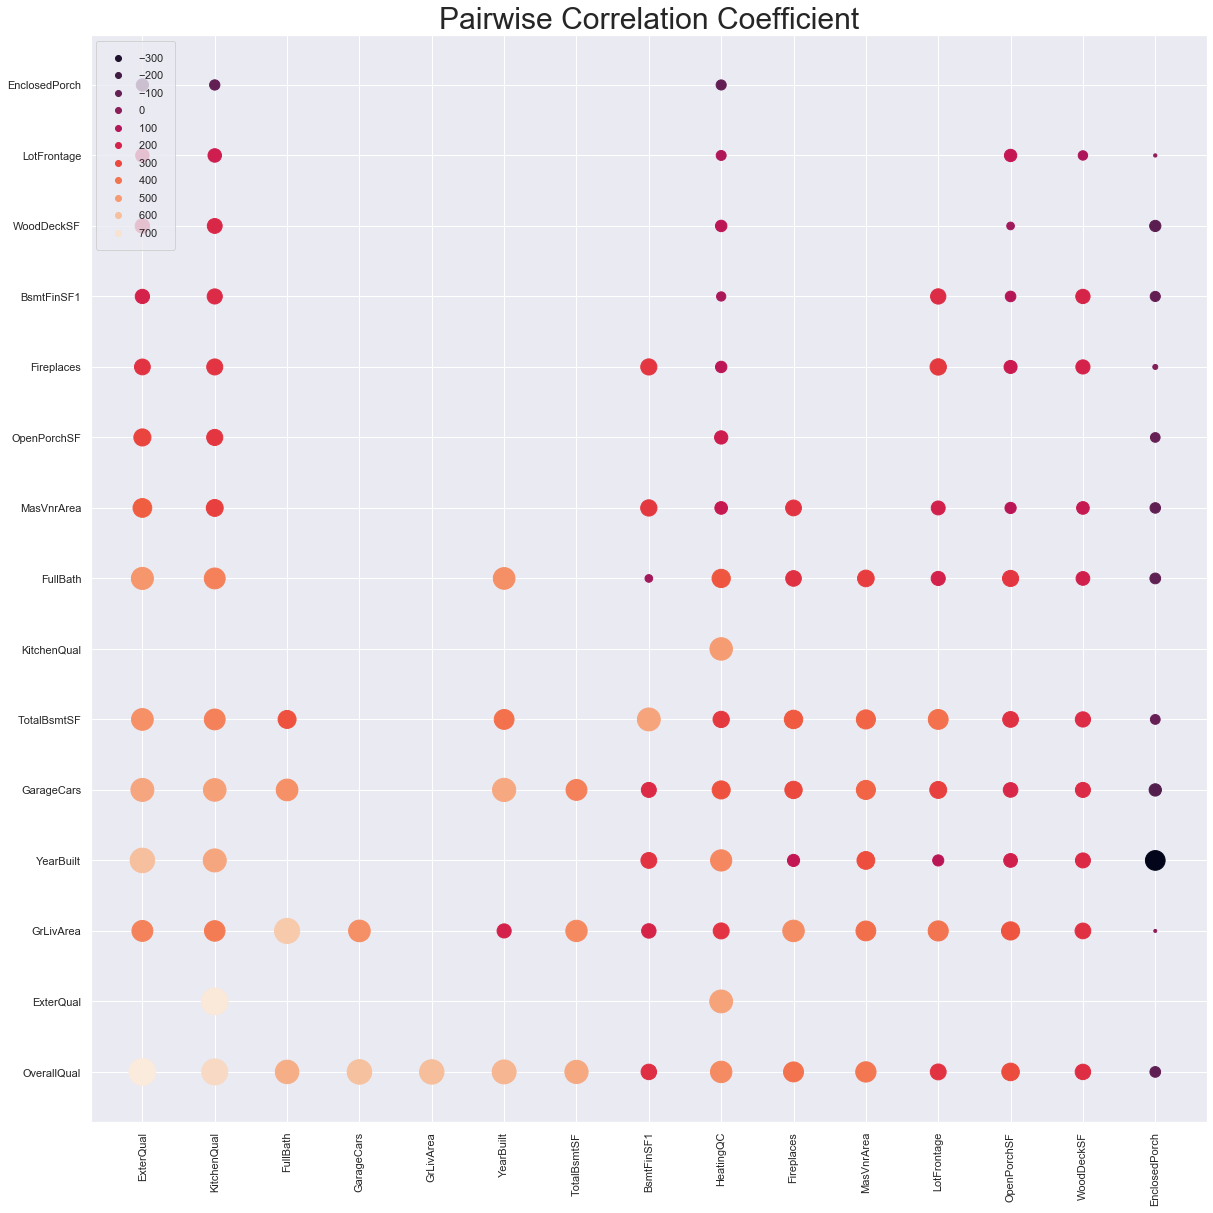

In [548]:
parwise_corr_invest = train_inves.corr()

parwise_corr_invest = parwise_corr_invest.where(np.triu(np.ones(parwise_corr_invest.shape), k=1).astype(np.bool))
parwise_corr_invest = parwise_corr_invest.unstack().transpose().sort_values(ascending=False).dropna()
parwise_corr_invest= pd.DataFrame(parwise_corr_invest)
parwise_corr_invest=parwise_corr_invest.reset_index()
parwise_corr_invest.columns = ['Feature1','Feature2', 'Correlation_Coefficient']

scale =1000
pc = [scale* corr_coeff for corr_coeff in parwise_corr_invest['Correlation_Coefficient']]
pc_abs= np.abs(pc)
re_pc= [ corr_coeff for corr_coeff in parwise_corr_invest['Correlation_Coefficient']]

fig, ax = plt.subplots(figsize=(20,20))
sc=ax.scatter(parwise_corr_invest['Feature1'], parwise_corr_invest['Feature2'], marker = 'o', s = pc_abs,c=pc)
ax.legend(*sc.legend_elements(),borderpad=1,loc='upper left')
plt.title('Pairwise Correlation Coefficient',fontsize= 30)
plt.tick_params(axis ='x', rotation = 90) 

plt.show()

**We can observe from the above Plot that there are still few big blobs that are observed** <br>

--> Now we see that we have features that are not highly correltad to each other <br/>
--> **BsmtFinSF1** is highly correlated with TotalBsmtSF, so we remove BsmtFinSF1 <br>
--> One Interesting fact that we can observe from above that **OverallQual** is highly correlated with below features:<br>
     **'Fullbath', 'GarageCars', 'GrLivArea', 'YearRemodAdd', 'YearBuilt', 'TotalBsmtSF', 'MasVnrArea','ExterQual', 'KitchenQual','HeatingQC'** 

In [549]:
col_selected= ['Id','SalePrice','OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','YearBuilt',
               'MasVnrArea','Fireplaces','LotFrontage','WoodDeckSF','OpenPorchSF','EnclosedPorch',
              'ExterQual', 'KitchenQual','HeatingQC']

print( 'Total Features selected for further Investigation are: ', len(col_selected)-2)
print( 'Features selected for further Investigation are: ', (col_selected))


Total Features selected for further Investigation are:  15
Features selected for further Investigation are:  ['Id', 'SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'MasVnrArea', 'Fireplaces', 'LotFrontage', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ExterQual', 'KitchenQual', 'HeatingQC']


**We can observe carefully that we have good set of features that can be segmented into below categories:** <br>
**Internal House Properties :** #Rooms, #Area, #Baths, #Garage <br>
**External House Properties:** #LotFrontage, #WoodDeckSF, #OpenPorchSF  <br>
**Age of the House:** #YearRemodAdd, #YearRemodAdd <br>
**Safety :** Fireplaces <br>
**Quality:** KitchenQuality, ExternalQuality, HeatingQuality

In [550]:
train_final= []
train_final= train[col_selected].copy()
train_final = train_final.groupby(train_final.columns, axis = 1).transform(lambda x: x.fillna(x.mean()))
train_final.head()

,Id,SalePrice,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,MasVnrArea,Fireplaces,LotFrontage,WoodDeckSF,OpenPorchSF,EnclosedPorch,ExterQual,KitchenQual,HeatingQC
0,1,208500,7,1710,2,856,2,2003,196.0,0,65.0,0,61,0,4,4,5
1,2,181500,6,1262,2,1262,2,1976,0.0,1,80.0,298,0,0,3,3,5
2,3,223500,7,1786,2,920,2,2001,162.0,1,68.0,0,42,0,4,4,5
3,4,140000,7,1717,3,756,1,1915,0.0,1,60.0,0,35,272,3,4,4
4,5,250000,8,2198,3,1145,2,2000,350.0,1,84.0,192,84,0,4,4,5


In [551]:
# TODO: code to generate Plot 2

# Plotting further Log Log Plots to determine  variability of Numerical features with Sale_Price

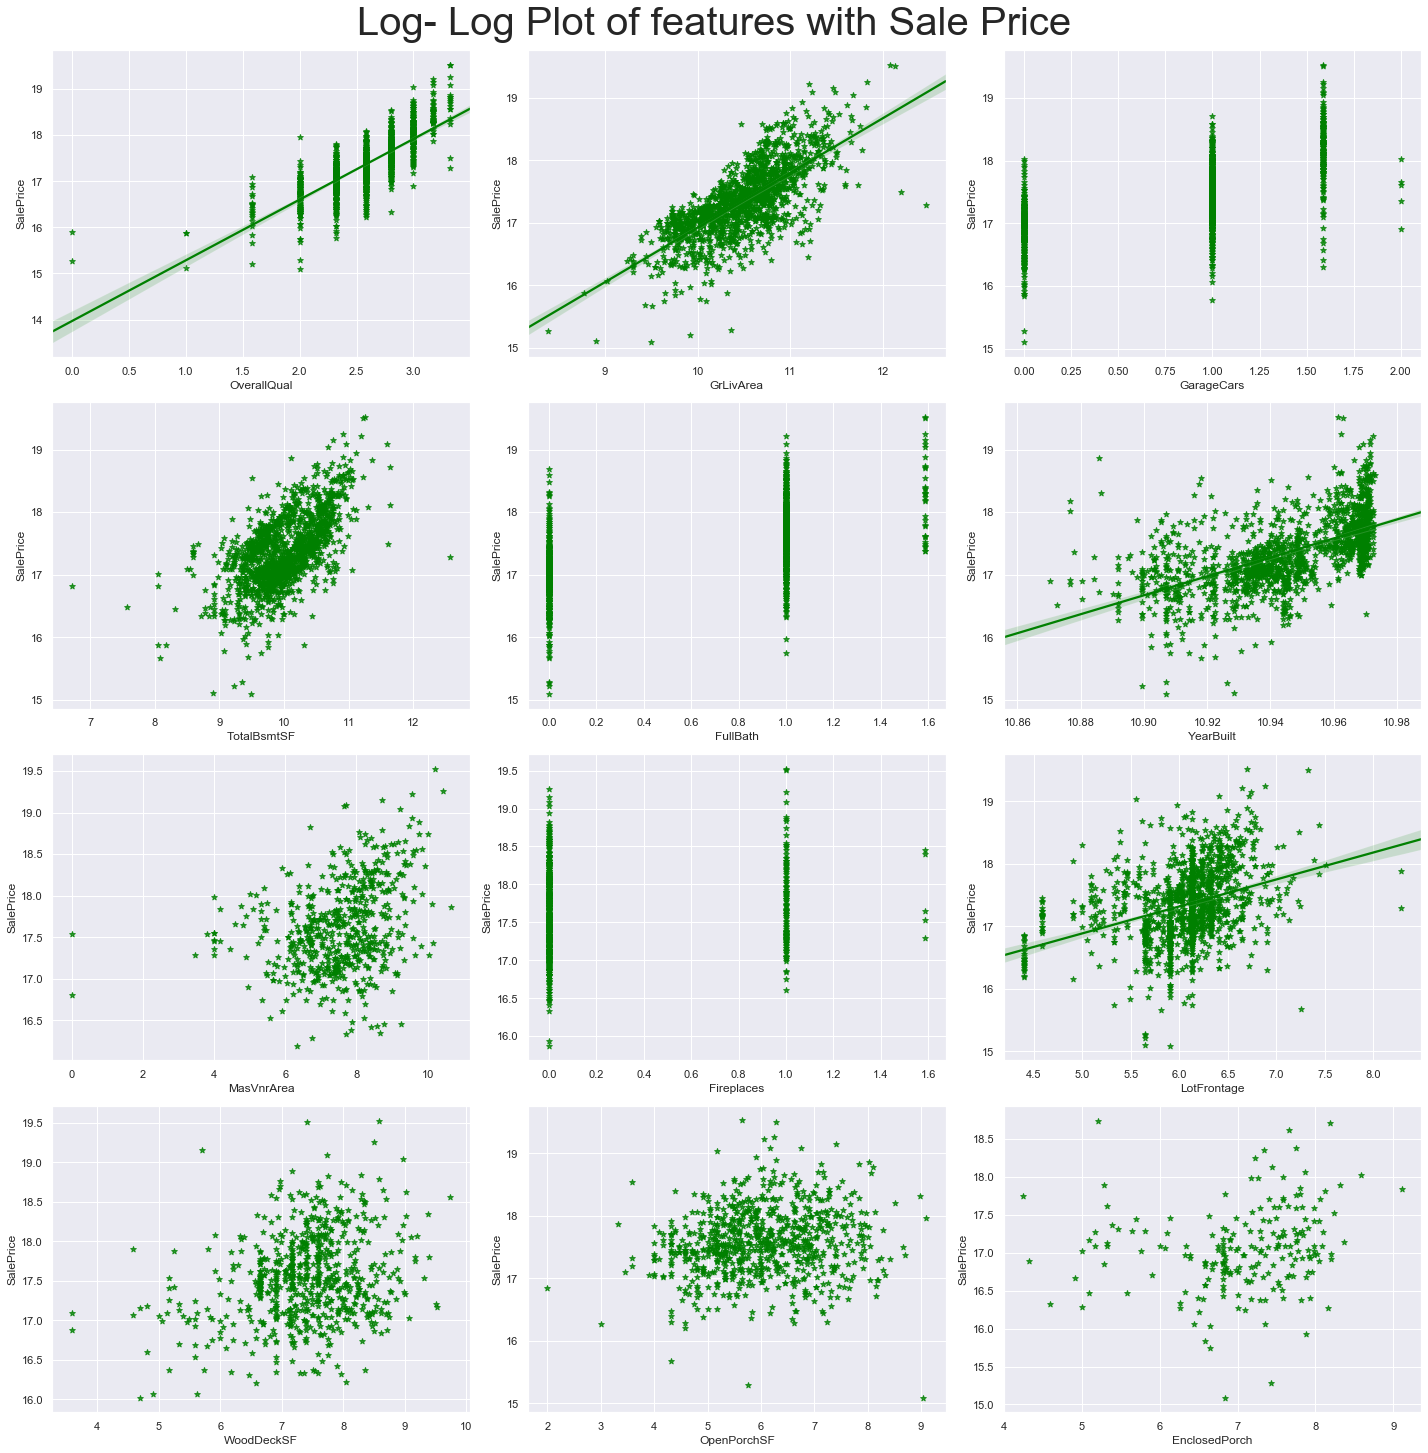

In [552]:
#scatterplot
sns.set()
cat_cols = ['OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','YearBuilt',
               'MasVnrArea','Fireplaces','LotFrontage','WoodDeckSF','OpenPorchSF','EnclosedPorch']
fig = plt.figure(figsize=(20, 60))
fig.suptitle('Log- Log Plot of features with Sale Price',size=40)

tot_plots=len(cat_cols)
i=1
for var in cat_cols:
    plt.subplot(tot_plots, 3, i)
    sns.regplot(x=np.log2(train_final[var]),y=np.log2(train_final.SalePrice),color='green', marker='*')
    i=i+1
fig.tight_layout()
fig.subplots_adjust(top=0.97)
    

**Below are the observations from the Above Power Law Plot** <br>

--> Sale Price has Postive Slope with all the features except EnclosedPorch and KitchenAbvGr <br>
--> 'OverallQual', 'GrLivArea' , 'YearBuilt', 'LotFrontage', 'TotalBsmtSF', 'MasVnrArea' , 'WoodDeckSF' follows a quite **observable power law** <br>
--> **GrLivArea and SalePrice seems to be linearly proportional**
--> **It does matter how many KitchenAbvGr are present , we see a downward swing as Saleprice goes down with high KitchenAbvGr** <br>
--> **We can see that with increasing FullBath,Fireplaces and GarageCars there is a upward swing in the Sale Price** <br>


In [553]:
#descriptive statistics summary
train_final['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [554]:
# TODO: code to generate Plot 3

Text(0.5, 0, 'Log[SalePrice]')

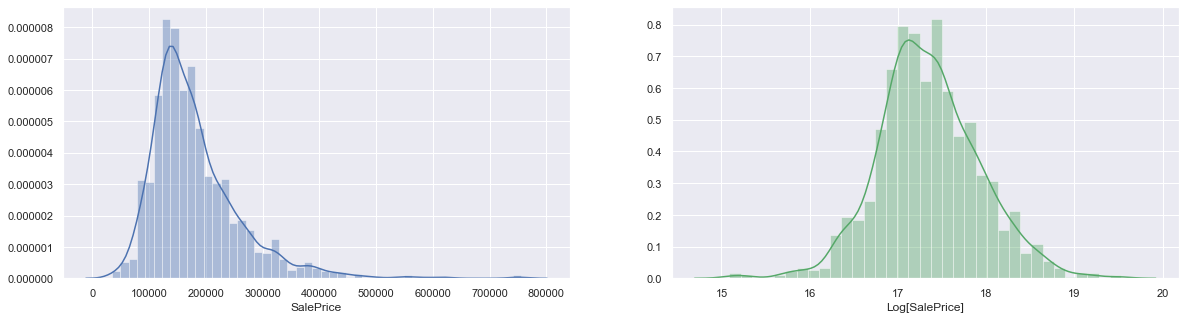

In [555]:
#histogram
fig = plt.figure(figsize= (20,5))
plt.subplot(1,2,1)
sns.distplot((train_final['SalePrice']))
plt.subplot(1,2,2)
sns.distplot(np.log2(train_final['SalePrice']),color="g")
plt.xlabel('Log[SalePrice]')

In [556]:
# TODO: code to generate Plot 4

# Relationship with categorical features : 'OverallQual','ExterQual', 'KitchenQual','HeatingQC'

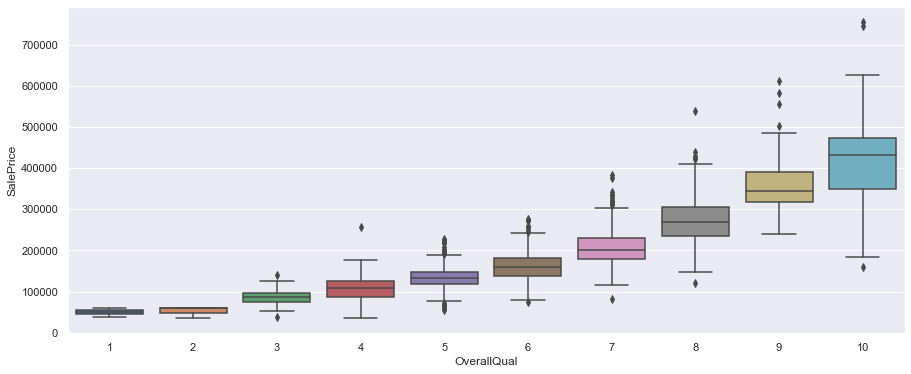

In [557]:
var = 'OverallQual'
data = pd.concat([train_final['SalePrice'], train_final[var]], axis=1)
f, ax = plt.subplots(figsize=(15, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)


**Inference: SalePrice increases with OverallQuality improvement**

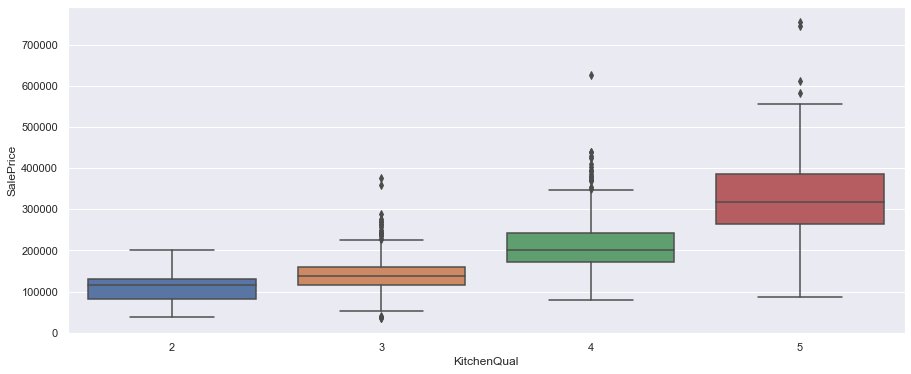

In [558]:
var = 'KitchenQual'
data = pd.concat([train_final['SalePrice'], train_final[var]], axis=1)
f, ax = plt.subplots(figsize=(15, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)

**Inference: SalePrice increases with KithcenQual improvement**

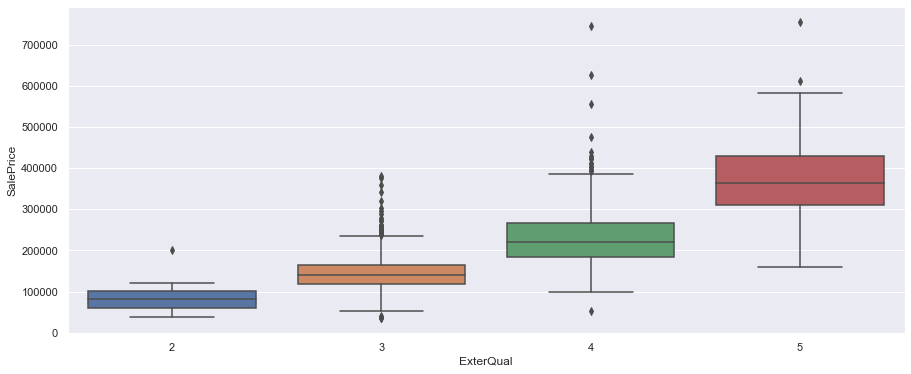

In [559]:
var = 'ExterQual'
data = pd.concat([train_final['SalePrice'], train_final[var]], axis=1)
f, ax = plt.subplots(figsize=(15, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)

**Inference: SalePrice increases with External improvement**

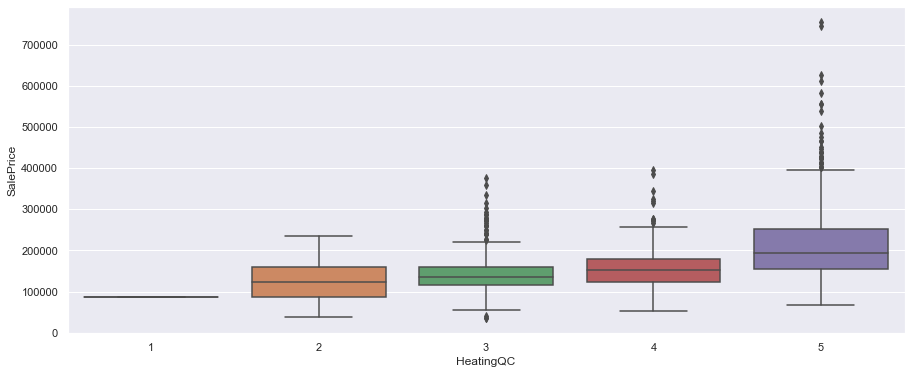

In [561]:
var = 'HeatingQC'
data = pd.concat([train_final['SalePrice'], train_final[var]], axis=1)
f, ax = plt.subplots(figsize=(15, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)



**Inference: SalePrice increases with HeatingQC improvement**

In [563]:
# TODO: code to generate Plot 5

<function abs(x, /)>

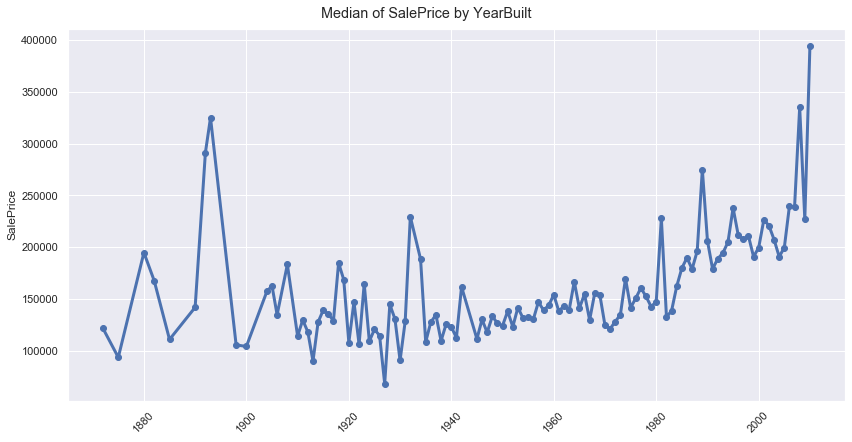

In [564]:
var= 'YearBuilt'
dxp.aggplot(agg='SalePrice', data=train_final, groupby=var, kind='line', aggfunc='median',title="Median of SalePrice by " + var, xlabel=var,rot=45)
abs

**There is a spike in Price around late 1890 and then we observe a massive drop in price in 1900 and then we observe a steady value year on year untill 1930,there is again a spike in 1930 after we observe a steady rate till 1980, post 1980 we see an exponential increase in the SalePrice**

## Part 3 - Handcrafted Scoring Function

In [565]:
# TODO: code for scoring function

Describe your scoring function and how well you think it worked.

# Let's build a scoring function for defining Desirability 

In [578]:
print('Lets select the below Feature for defining desirability:')
des_col= ['OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','MasVnrArea','Fireplaces',
          'LotFrontage','WoodDeckSF','OpenPorchSF','EnclosedPorch','YearBuilt','ExterQual', 'KitchenQual','HeatingQC']
print('\033[1m' + str(des_col))

Lets select the below Feature for defining desirability:
['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'MasVnrArea', 'Fireplaces', 'LotFrontage', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'YearBuilt', 'ExterQual', 'KitchenQual', 'HeatingQC']


### We will define weight of every feature as the correlation to the SalePrice <br>
Let's get the weight of every feature 

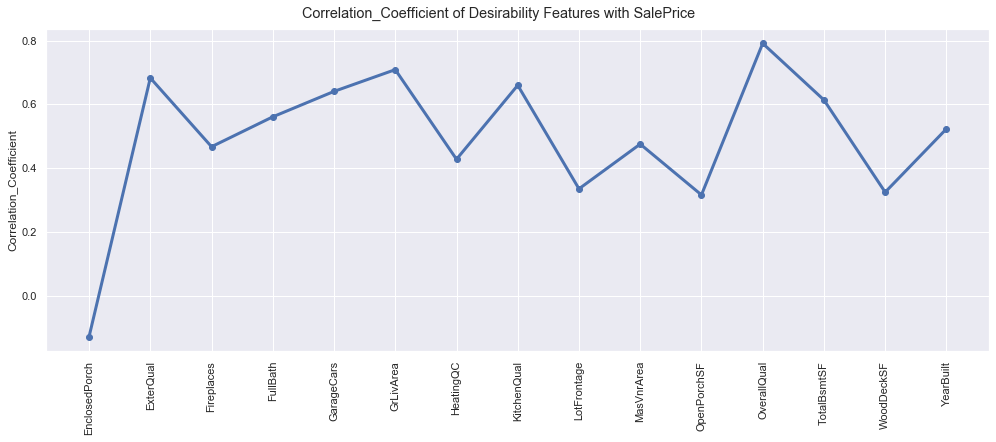

In [579]:
corr_wt= train_final[des_col].corrwith(train_final['SalePrice']).sort_values(ascending=False)
corr_wt=corr_wt.reset_index()
corr_wt.columns = ['Feature', 'Correlation_Coefficient']

var= 'Feature'
dxp.aggplot(agg='Correlation_Coefficient', data=corr_wt, groupby=var, kind='line', aggfunc='median',title="Correlation_Coefficient of Desirability Features with SalePrice" , xlabel=var,rot=90,figsize=(14,6))


In [580]:
print('\033[1m' +  'Correlation_Coefficient of every feature with SalePrice:')
corr_wt['Correlation_Coefficient'] = abs(corr_wt['Correlation_Coefficient'])
print('')

print(corr_wt.to_string(index=False))

Correlation_Coefficient of every feature with SalePrice:

       Feature  Correlation_Coefficient
   OverallQual                 0.790982
     GrLivArea                 0.708624
     ExterQual                 0.682639
   KitchenQual                 0.659600
    GarageCars                 0.640409
   TotalBsmtSF                 0.613581
      FullBath                 0.560664
     YearBuilt                 0.522897
    MasVnrArea                 0.475241
    Fireplaces                 0.466929
     HeatingQC                 0.427649
   LotFrontage                 0.334901
    WoodDeckSF                 0.324413
   OpenPorchSF                 0.315856
 EnclosedPorch                 0.128578


### Normalizing the columns in the scale 0-1

In [581]:
from sklearn.preprocessing import MinMaxScaler
norm_train_data = train_final.copy()
scaler = MinMaxScaler() 
norm_train_data[des_col] = scaler.fit_transform(norm_train_data[des_col]) 


In [582]:
des_weights = pd.Series(list(corr_wt['Correlation_Coefficient']), index=list(corr_wt['Feature']))

In [583]:
tot_wt=sum(corr_wt['Correlation_Coefficient'])
norm_train_data['weighted_score']= (norm_train_data * des_weights).sum(1)/tot_wt
norm_train_data['weighted_score'] = scaler.fit_transform(pd.DataFrame(norm_train_data['weighted_score']))
norm_train_data.head()


,Id,SalePrice,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,MasVnrArea,Fireplaces,LotFrontage,WoodDeckSF,OpenPorchSF,EnclosedPorch,ExterQual,KitchenQual,HeatingQC,weighted_score
0,1,208500,0.666667,0.259231,0.50,0.140098,0.666667,0.949275,0.12250,0.000000,0.150685,0.000000,0.111517,0.000000,0.666667,0.666667,1.00,0.493046
1,2,181500,0.555556,0.174830,0.50,0.206547,0.666667,0.753623,0.00000,0.333333,0.202055,0.347725,0.000000,0.000000,0.333333,0.333333,1.00,0.412595
2,3,223500,0.666667,0.273549,0.50,0.150573,0.666667,0.934783,0.10125,0.333333,0.160959,0.000000,0.076782,0.000000,0.666667,0.666667,1.00,0.518512
3,4,140000,0.666667,0.260550,0.75,0.123732,0.333333,0.311594,0.00000,0.333333,0.133562,0.000000,0.063985,0.492754,0.333333,0.666667,0.75,0.395389
4,5,250000,0.777778,0.351168,0.75,0.187398,0.666667,0.927536,0.21875,0.333333,0.215753,0.224037,0.153565,0.000000,0.666667,0.666667,1.00,0.603899


In [584]:
norm_train_data['weighted_score'].describe()

count    1460.000000
mean        0.397142
std         0.141490
min         0.000000
25%         0.277595
50%         0.377307
75%         0.505193
max         1.000000
Name: weighted_score, dtype: float64

Text(0.5, 1.0, 'Distribution of scores assigned to every house')

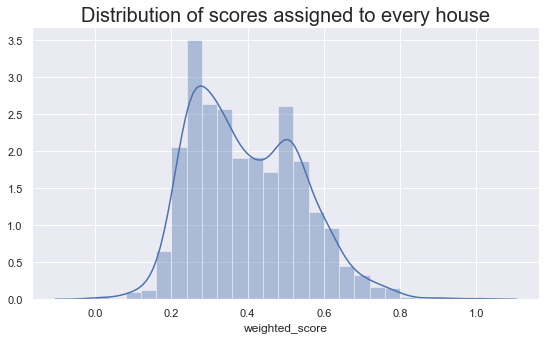

In [585]:
#histogram
fig = plt.figure(figsize= (20,5))
plt.subplot(1,2,1)
sns.distplot((norm_train_data['weighted_score']))
plt.title('Distribution of scores assigned to every house',size= 20)


### Let's observe the score's distribution with the Sale Price

Text(0.5, 1.0, 'Sale price V/s Scores Assigned to Houses')

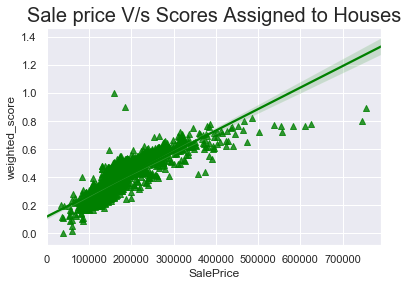

In [586]:
sns.regplot(x=(norm_train_data['SalePrice']),y=(norm_train_data['weighted_score']),color='green', marker='^')
plt.title('Sale price V/s Scores Assigned to Houses',size=20)

### We can Clearly See from above plot that score follows a pretty linear relationship with the Sale Price, higher the Score higher the Selling Price

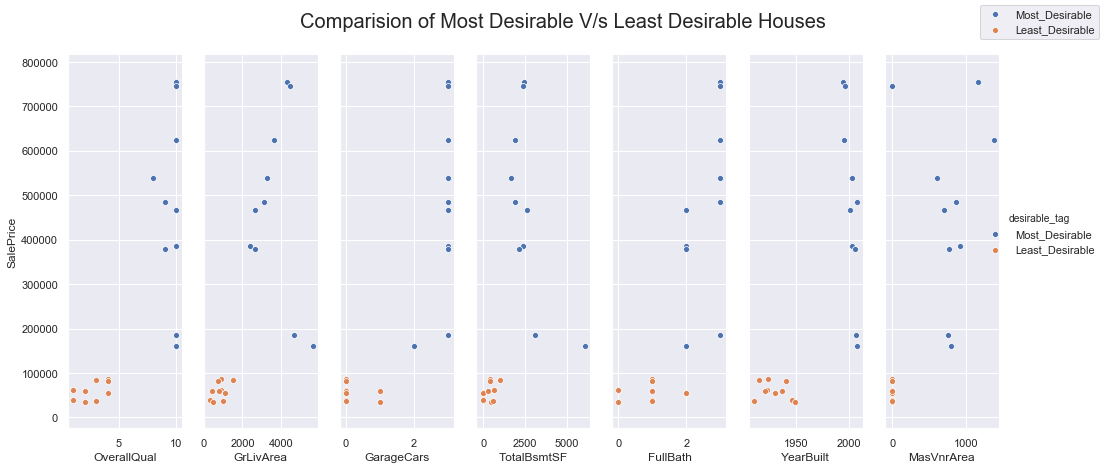

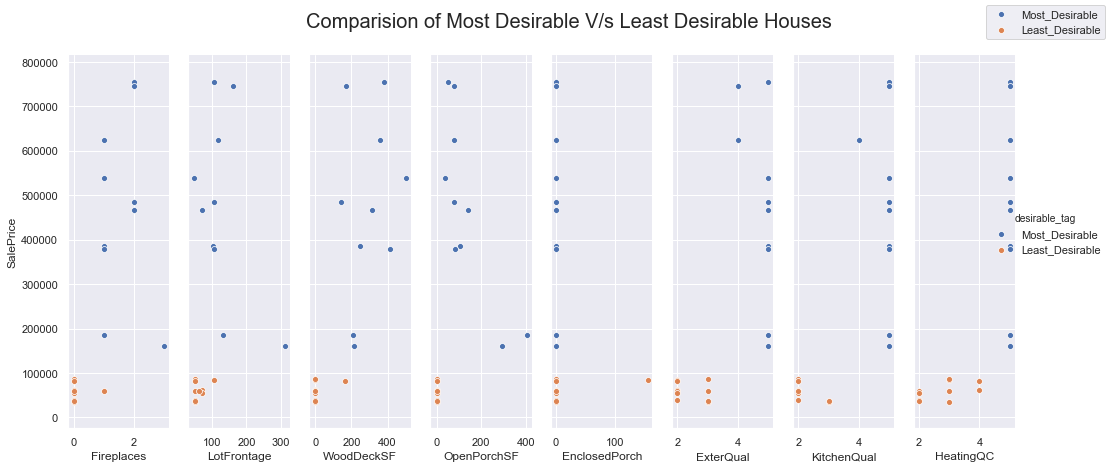

In [588]:
most_desirable=norm_train_data.nlargest(10, 'weighted_score')
most_desirable= most_desirable[['Id','weighted_score']]
most_desirable_houses = pd.merge(train_final, most_desirable,on='Id')
most_desirable_houses['desirable_tag']= 'Most_Desirable'

least_desirable=norm_train_data.nsmallest(10, 'weighted_score')
least_desirable= least_desirable[['Id','weighted_score']]
least_desirable_houses= pd.merge(train_final, least_desirable,on='Id')
least_desirable_houses['desirable_tag']= 'Least_Desirable'


des_houses= most_desirable_houses
des_houses=des_houses.append(least_desirable_houses)

cat_cols = ['OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','YearBuilt',
               'MasVnrArea',]
pp = sns.pairplot(data=des_houses,y_vars=['SalePrice'],x_vars=cat_cols,hue="desirable_tag")


# pp._legend.set_bbox_to_anchor((0.5, 0.4))
pp.fig.suptitle("Comparision of Most Desirable V/s Least Desirable Houses",size=20)

handles = pp._legend_data.values()
labels = pp._legend_data.keys()
pp.fig.legend(handles=handles, labels=labels, loc='upper right', ncol=1)
pp.fig.set_size_inches(15,8)

    
cat_cols = ['Fireplaces','LotFrontage','WoodDeckSF','OpenPorchSF','EnclosedPorch','ExterQual',
            'KitchenQual','HeatingQC']
pp = sns.pairplot(data=des_houses,y_vars=['SalePrice'],x_vars=cat_cols,hue="desirable_tag")


# pp._legend.set_bbox_to_anchor((0.5, 0.4))
pp.fig.suptitle("Comparision of Most Desirable V/s Least Desirable Houses",size=20)

handles = pp._legend_data.values()
labels = pp._legend_data.keys()
pp.fig.legend(handles=handles, labels=labels, loc='upper right', ncol=1)
pp.fig.set_size_inches(15,8)

    
    

### From above plot we can infer below observations:
**Expected Outcomes:**

--> Most Desirable Houses have higher **OverallQual** ~10 <br>
--> Higher the GrLivArea higher the **Desirability** roughly 5000 sq km <br>
--> More the **Garage Space** higher the desirability , for least desirable houses garage cars is 0 on the other hand for most desirable it is 4<br>
--> we can clearly see that there is a distinct pattern in **TotalBsmtSF**, higher the surface more the desirability<br>
--> An interesting fact that most desirable houses are the recent houses that were **Yearbuilt** in 2000, old houses are not desirable<br>
--> Most desirable houses have higher **FullBath**<br>
--> Similary there is a clear pattern in **'MasVnrArea','Fireplaces','LotFrontage','WoodDeckSF'**, higher the value of these features higher the desirability, higher the selling price<br>
--> For most desirable houses **'ExterQual','KitchenQual','HeatingQC'** have highest quality while there is clearly a distict pattern that least desirable houses have poor qualities of 'ExterQual','KitchenQual','HeatingQC' 

**UnExpected Outcomes:**
--> Unexpectedly, 'OpenPorchSF','EnclosedPorch' does not have pretty much distinct pattern between most desirable and least desirable houses<br>


In [589]:
md= most_desirable_houses[['Id','SalePrice','weighted_score']].sort_values(by=['weighted_score'],ascending=False)
print('\033[1m' + 'Top 10 Desirable Houses with their score and the SellingPrice')
print('')

print(md.to_string(index=False))

Top 10 Desirable Houses with their score and the SellingPrice

   Id  SalePrice  weighted_score
 1299     160000        1.000000
  524     184750        0.904391
  692     755000        0.894049
  799     485000        0.823051
 1374     466500        0.804510
 1183     745000        0.798701
 1170     625000        0.780073
  225     386250        0.778978
  770     538000        0.770788
  478     380000        0.768834


What is the ten least desirable houses?

In [590]:
ld= least_desirable_houses[['Id','SalePrice','weighted_score']].sort_values(by=['weighted_score'])
print('\033[1m' + 'Least 10 Desirable Houses with their score and the SellingPrice')
print('')

print(ld.to_string(index=False))

Least 10 Desirable Houses with their score and the SellingPrice

   Id  SalePrice  weighted_score
  534      39300        0.000000
  376      61000        0.017960
  637      60000        0.051190
  706      55000        0.089048
   89      85000        0.091031
 1101      60000        0.093266
 1324      82500        0.105484
  977      85500        0.108738
  969      37900        0.109422
  917      35311        0.120303


## Part 4 - Pairwise Distance Function

In [591]:
# TODO: code for distance function

How well does the distance function work? When does it do well/badly?

### we will pick the below normalised features for calculating the distance function 

In [592]:
### We will One Hot Encode the Categorical Variable
# from sklearn.preprocessing import LabelEncoder

# lb_enc = LabelEncoder()
# norm_train_data["YearCode"] = lb_enc.fit_transform(norm_train_data["YearBuilt"])
# norm_train_data[["YearBuilt", "YearCode"]].head(5)

In [593]:
dist_fn_cols = ['OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','MasVnrArea',
                'Fireplaces','LotFrontage','WoodDeckSF','YearBuilt','ExterQual',
            'KitchenQual','HeatingQC']

In [594]:
dist_data= norm_train_data[dist_fn_cols]

### Finding first the Squared Euclidean Distance and Investigating

In [595]:
from scipy.spatial import distance
#Using Squared Euclidean Distance
dist_mat = pd.DataFrame(distance.cdist(dist_data, dist_data, 'sqeuclidean'))
dist_mat.shape


(1460, 1460)

In [596]:
# all_dist= dist_mat.values.flatten()
keep = np.triu(np.ones(dist_mat.shape)).astype('bool').reshape(dist_mat.size)
all_dist= dist_mat.stack()[keep]

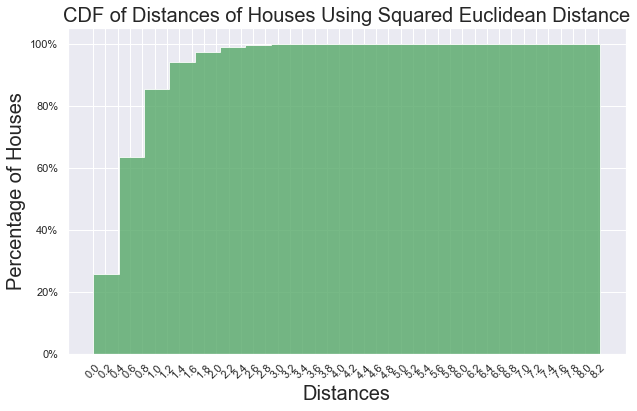

In [597]:
plt.figure(figsize=(10,6))

plt.hist(all_dist,density=True,bins =20, histtype='stepfilled',cumulative=1, label='Empirical',facecolor='g', alpha=0.8)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xticks(np.arange(0,all_dist.max(),0.2))
plt.tick_params(axis ='x', rotation = 45,length =5)
plt.title('CDF of Distances of Houses Using Squared Euclidean Distance',fontsize=20)
plt.ylabel('Percentage of Houses', fontsize=20)
plt.xlabel('Distances', fontsize=20)
plt.grid(True)


### From the above cdf plot we see that 20% of the houses are very close to each other as the distance between them ranges from 0-0.4 so we observe lot many houses that are similar, let's investigate further with other distance function<br>

### Below are the problems with the Euclidean Distance: 
--> Euclidean distance will work fine as long as the dimensions are equally weighted and are independent of each other but in our case our features are correlated wiuth each other <br>
--> Euclidean distance is a distance between two points only. It does not consider how the rest of the points in the dataset vary. So, it cannot be used to really judge how close a point actually is to a distribution of points. <br>

### Let's find the Mahanalobis distance 

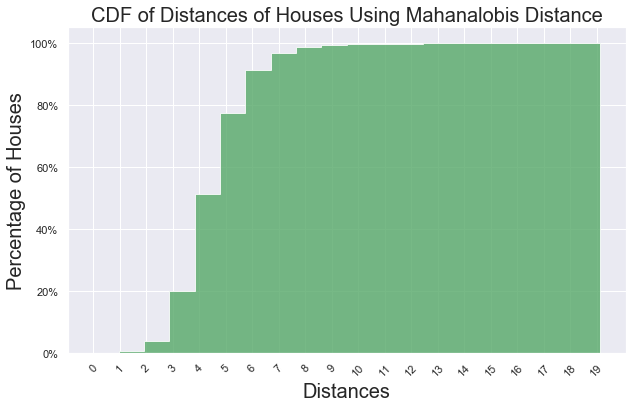

In [598]:
dist_mat = pd.DataFrame(distance.cdist(dist_data, dist_data, 'mahalanobis', VI=None))

keep = np.triu(np.ones(dist_mat.shape)).astype('bool').reshape(dist_mat.size)
all_dist= dist_mat.stack()[keep]


plt.figure(figsize=(10,6))

plt.hist(all_dist,density=True,bins =20, histtype='stepfilled',cumulative=1, label='Empirical',facecolor='g', alpha=0.8)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xticks(np.arange(0,all_dist.max(),1))
plt.tick_params(axis ='x', rotation = 45,length =5)
plt.title('CDF of Distances of Houses Using Mahanalobis Distance',fontsize=20)
plt.ylabel('Percentage of Houses', fontsize=20)
plt.xlabel('Distances', fontsize=20)
plt.grid(True)


### We now observe that only 20% of the houses are very close to each other as the distance between them ranges from 0-4


## Part 5 - Clustering

In [599]:
# TODO: code for clustering and visualization

### Lets build the KMeans Clustering on the distance Matrix onbtained using Mahanalobis distance

### Let's reduce the dimensionality of our distance matrix obtained above using PCA

In [600]:
print('Current Distance Matrix Shape')
dist_mat.shape

Current Distance Matrix Shape


(1460, 1460)

In [601]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
dist_mat_std = pd.DataFrame(sc.fit_transform(dist_mat))

### Projecting 1460*1460 matrix along the eigenvector of the matrix

In [602]:
cov_mat = np.cov(dist_mat_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

In [603]:
# calculate cumulative sum of explained variances
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)


In [604]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print('Transformed Matrix W:\n', w)

print('Shape of the Transformed Distance Metrix')
print(w.shape)

Transformed Matrix W:
 [[-0.02958317 -0.03087647]
 [-0.02585835 -0.01569147]
 [-0.02990944 -0.04072904]
 ...
 [-0.01827432 -0.02605354]
 [-0.02411875  0.02340681]
 [-0.0163604   0.00534814]]
Shape of the Transformed Distance Metrix
(1460, 2)


In [605]:
dist_mat_pca = pd.DataFrame(dist_mat_std.dot(w))

### Distribution of the Distance Matrix in the 2D Space

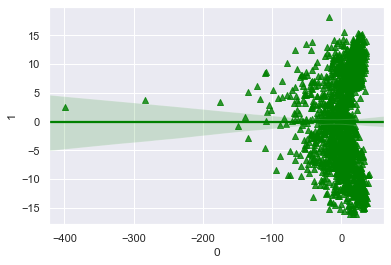

In [606]:
sns.regplot(x=dist_mat_pca[0],y=dist_mat_pca[1],color='green', marker='^')

How well do the clusters reflect neighborhood boundaries? Write a discussion on what your clusters capture and how well they work.

**Let's find the Elbow curve for the number of optimal K for clustering**

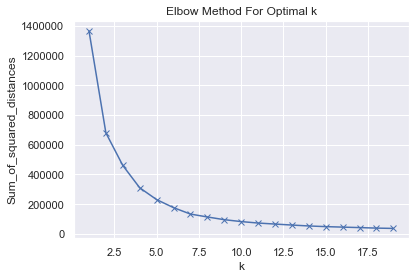

In [607]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(dist_mat_pca)
    Sum_of_squared_distances.append(km.inertia_)
    
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


### In the plot above the elbow is at k=7 indicating the optimal k for this dataset is 7

In [608]:
n_clust=7
house_clust = KMeans(n_clusters=n_clust,n_init=4,max_iter=100,n_jobs=4)
house_clust.fit(dist_mat_pca)
print ('\033[1m' + 'Shape of the Centroid Matrix: ' + str(house_clust.cluster_centers_.shape))

Shape of the Centroid Matrix: (7, 2)


In [609]:
pred_kmeans = house_clust.predict(dist_mat_pca)

### Cluster Centres 

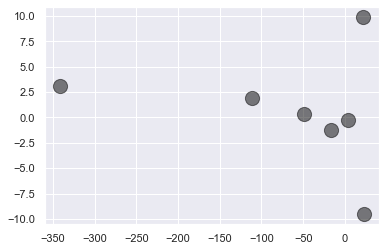

In [610]:
centers = house_clust.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

Text(0.5, 1.0, 'kmeans Clustering Visual Plot, red indicates the cluster centre')

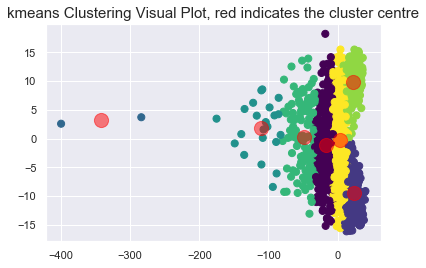

In [611]:
plt.scatter(dist_mat_pca[0], dist_mat_pca[1], c=pred_kmeans, s=50, cmap='viridis')

centers = house_clust.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.title('kmeans Clustering Visual Plot, red indicates the cluster centre',size= 15)

In [612]:
pred_cluster_label=pd.DataFrame()
pred_cluster_label= pd.DataFrame(norm_train_data['Id'].copy())

In [613]:
pred_cluster_label['cluster_label']= pd.DataFrame(pred_kmeans)

In [614]:
df=pred_cluster_label.groupby('cluster_label')['Id'].count()
df=df.reset_index()

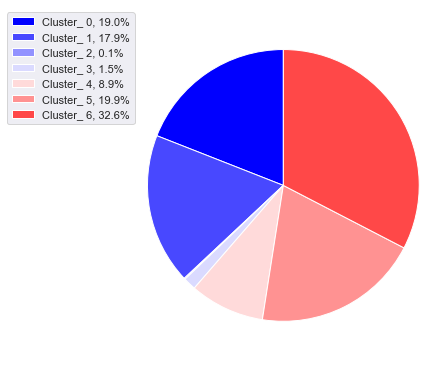

In [615]:
import matplotlib.pyplot as plt

sizes = df['Id']
labels = ["Cluster_ %s" % i for i in df['cluster_label']]

fig1, ax1 = plt.subplots(figsize=(6, 5))
fig1.subplots_adjust(0.3,0,1,1)

theme = plt.get_cmap('bwr')
ax1.set_prop_cycle("color", [theme(1. * i / len(sizes)) for i in range(len(sizes))])

_, _ = ax1.pie(sizes, startangle=90)

ax1.axis('equal')

total = sum(sizes)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, sizes)],
    prop={'size': 11},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure
)

plt.show()

### From the above clustering technique we onbserve that one of the cluster conatins only 0.1% data, which is probably due to the outlier values in the dataset, two clusters contain ~50% of the houses 

## Part 6 - Linear Regression

In [616]:
# TODO: code for linear regression

In [650]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [654]:
train_cols = ['OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','YearBuilt','MasVnrArea',
                'Fireplaces','LotFrontage','WoodDeckSF','ExterQual','KitchenQual','HeatingQC']
target_var=['SalePrice']

In [655]:
X= norm_train_data[train_cols]
y=np.log(norm_train_data[target_var])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm


y_pred = regressor.predict(X_test)
y_test_flat= np.exp(y_test.values.flatten())
y_pred_flat=np.exp(y_pred.flatten())

### Let's Find the Root Mean Square Error

In [656]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.11125579582490336
Mean Squared Error: 0.04382478557685151
Root Mean Squared Error: 0.20934370202337474


### Let's observe the Actual v/s Predicted values of few houses

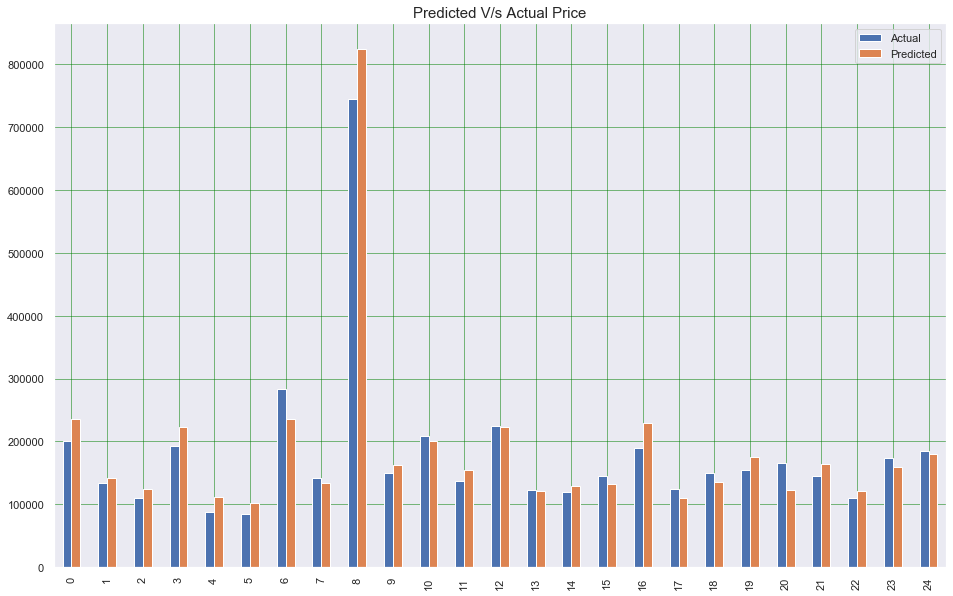

In [622]:
df = pd.DataFrame({'Actual': y_test_flat, 'Predicted': y_pred_flat.flatten()})
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Predicted V/s Actual Price',size=15)
plt.show()

### Few Samples of the test cases showing the predicted Model values v/s the Actual Values; though our model is not very precise, the predicted percentages are close to the actual ones.

How well/badly does it work? Which are the most important variables?

### Let's plot our prediction with the straight line with the actual test data :

Text(0.5, 1.0, 'Log(Actual Selling Price) V/s Log(Predicted Selling Price)')

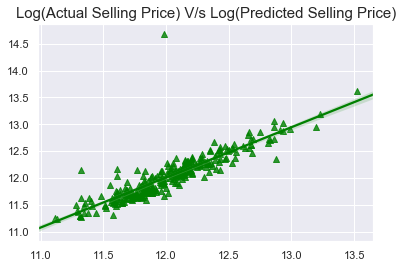

In [623]:
sns.regplot(x=pd.DataFrame(y_test).values.flatten(),y=pd.DataFrame(y_pred).values.flatten(),color='green', marker='^')
plt.title('Log(Actual Selling Price) V/s Log(Predicted Selling Price)',size=15)


**From the above plot we can observe the predicted values are pretty close to the actuals and fit on a linear line quite well**

## Part 7 - External Dataset

Describe the dataset and whether this data helps with prediction.

**I have taken external data from http://fred.stlouisfed.org/** <br>
Let's load and check what all feartures caould be handy for our use case <br>
we have taken three data sets namely:<br>
    --> HousingPrice Index, <br>
    --> Total Private Employees Ames <br>
    --> Unemployment Rate <br>

we will use the Year as the key to append these three columns to our existing dataset

In [624]:
hpidx = pd.read_csv('/Users/mehar/Downloads/Stony_Brook_University/Fall2019/DataScience/house-prices-advanced-regression-techniques/External_Data/HOUSEPRICEINDEX.csv')
prv_emp = pd.read_csv('/Users/mehar/Downloads/Stony_Brook_University/Fall2019/DataScience/house-prices-advanced-regression-techniques/External_Data/private_employees_ames.csv')
unemp_rate = pd.read_csv('/Users/mehar/Downloads/Stony_Brook_University/Fall2019/DataScience/house-prices-advanced-regression-techniques/External_Data/unemployment_rate.csv')

hpidx.columns = ['YearBuilt','hpidx']
prv_emp.columns = ['YearBuilt','private_employee']
unemp_rate.columns = ['YearBuilt','unemp_rate']


In [625]:
from datetime import datetime
hpidx['YearBuilt'] = pd.to_datetime(hpidx['YearBuilt']).dt.year
prv_emp['YearBuilt'] = pd.to_datetime(prv_emp['YearBuilt']).dt.year
unemp_rate['YearBuilt'] = pd.to_datetime(unemp_rate['YearBuilt']).dt.year


In [626]:
hpidx=hpidx.drop_duplicates()
prv_emp=prv_emp.drop_duplicates()
unemp_rate=unemp_rate.drop_duplicates()

hpidx= hpidx.groupby(['YearBuilt'])['hpidx'].mean()
hpidx= pd.DataFrame(hpidx)
hpidx=hpidx.reset_index()


In [627]:
##merging three files
all_ext = pd.merge(hpidx, prv_emp,on='YearBuilt')
all_ext = pd.merge(all_ext, unemp_rate,on='YearBuilt')

In [628]:
norm_train_data_ext = train_final.copy()
norm_train_data_ext = pd.merge(norm_train_data_ext,all_ext,on='YearBuilt')

In [629]:
train_ext_cols = ['OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','YearBuilt','MasVnrArea',
                'Fireplaces','LotFrontage','WoodDeckSF','ExterQual','KitchenQual','HeatingQC','hpidx','private_employee','unemp_rate']
target_ext_var=['SalePrice']

In [630]:
scaler = MinMaxScaler() 
norm_train_data_ext[train_ext_cols] = scaler.fit_transform(norm_train_data_ext[train_ext_cols]) 


In [631]:
X= norm_train_data_ext[train_ext_cols]
y=np.log(norm_train_data_ext[target_ext_var])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor_ext = LinearRegression()  
regressor_ext.fit(X_train, y_train) #training the algorithm


y_pred = regressor_ext.predict(X_test)
y_test_flat= np.exp(y_test.values.flatten())
y_pred_flat=np.exp(y_pred.flatten())


### Let's Find the Root Mean Square Error

In [632]:
print('\033[1m' + 'Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('\033[1m' + 'Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('\033[1m' + 'Log Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.10298246025134092
Mean Squared Error: 0.019828598464149545
Root Mean Squared Error: 0.14081405634434918


# We observe that the RMSE goes down from 0.20 to 0.14, there is 30% improvement in the overall error rate

### Let's observe the Actual v/s Predicted values of few houses after adding external data

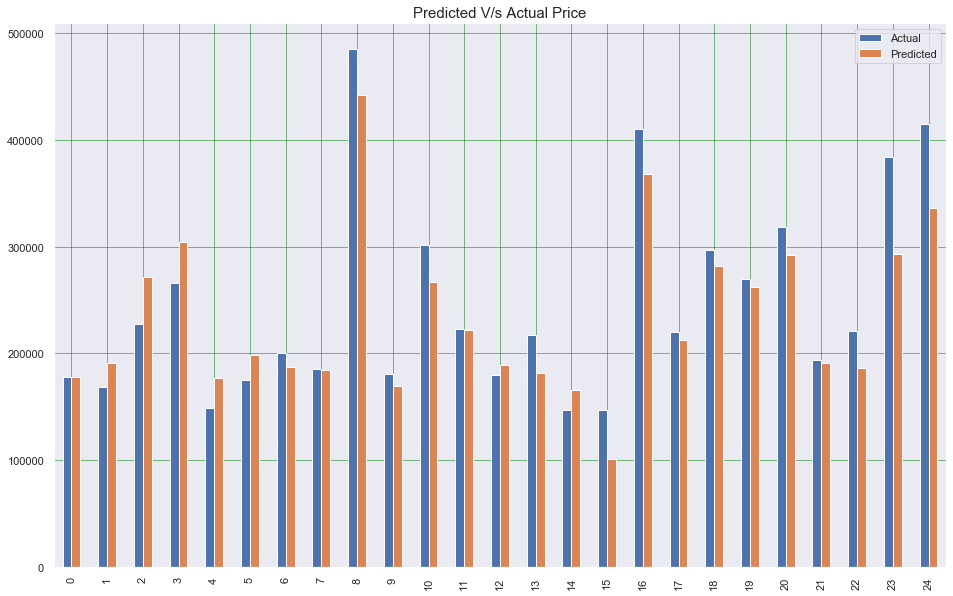

In [633]:
df = pd.DataFrame({'Actual': y_test_flat, 'Predicted': y_pred_flat.flatten()})
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Predicted V/s Actual Price',size=15)
plt.show()

### Let's plot our prediction with the straight line with the actual test data after adding external data:

Text(0.5, 1.0, 'Log(Actual Selling Price) V/s Log(Predicted Selling Price)')

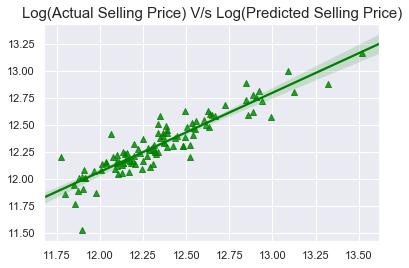

In [634]:
sns.regplot(x=pd.DataFrame(y_test).values.flatten(),y=pd.DataFrame(y_pred).values.flatten(),color='green', marker='^')
plt.title('Log(Actual Selling Price) V/s Log(Predicted Selling Price)',size=15)


**From the above plot we can observe the predicted values perfectly fit on a straight line after adding external data**

## Part 8 - Permutation Test

In [646]:
from sklearn.model_selection import permutation_test_score
from sklearn import metrics
def lin_reg(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    regressor = LinearRegression()  
    regressor.fit(X_train, y_train) 
    regressor.score(X_train, y_train)
    y_pred_xt = regressor.predict(X_test)
    y_pred_x = regressor.predict(X)
    return regressor,y_pred_xt,y_pred_x

In [658]:
for col in train_cols:
    X= pd.DataFrame(norm_train_data[col])
    y=np.log(norm_train_data['SalePrice'])
    regressor,y_pred_xt,y_pred_x = lin_reg(X,y)
    score, p_score, p_val = permutation_test_score(regressor,X,y,n_permutations=100)
    print('\033[1m' + 'Feature: '+ col)
    print('\033[1m' + 'Log of RMSE is : '+ str(round(np.sqrt(metrics.mean_squared_log_error(y,y_pred_x)),3)))
    print('\033[1m' + 'Pval is :' + str(round(p_val,3)) + '\n')
    

Feature: OverallQual
Log of RMSE is : 0.018
Pval is :0.01

Feature: GrLivArea
Log of RMSE is : 0.022
Pval is :0.01

Feature: GarageCars
Log of RMSE is : 0.023
Pval is :0.01

Feature: TotalBsmtSF
Log of RMSE is : 0.024
Pval is :0.01

Feature: FullBath
Log of RMSE is : 0.025
Pval is :0.01

Feature: YearBuilt
Log of RMSE is : 0.025
Pval is :0.01

Feature: MasVnrArea
Log of RMSE is : 0.028
Pval is :0.01

Feature: Fireplaces
Log of RMSE is : 0.027
Pval is :0.01

Feature: LotFrontage
Log of RMSE is : 0.029
Pval is :0.01

Feature: WoodDeckSF
Log of RMSE is : 0.029
Pval is :0.01

Feature: ExterQual
Log of RMSE is : 0.023
Pval is :0.01

Feature: KitchenQual
Log of RMSE is : 0.023
Pval is :0.01

Feature: HeatingQC
Log of RMSE is : 0.027
Pval is :0.01



# Applying XGBoost Algorithm

# Finding Top Contributing features

In [678]:
X=norm_train_data[train_cols]
y=np.log(norm_train_data['SalePrice'])
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

[0]	train-rmse:10.9547	test-rmse:10.9547
[50]	train-rmse:0.877806	test-rmse:0.879621
[99]	train-rmse:0.13759	test-rmse:0.175773


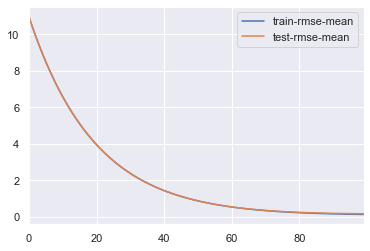

In [679]:
from sklearn import model_selection, preprocessing
import xgboost as xgb

for c in x_train.columns:
    if x_train[c].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(x_train[c].values)) 
        x_train[c] = lbl.transform(list(x_train[c].values))
        
for c in x_test.columns:
    if x_test[c].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(x_test[c].values)) 
        x_test[c] = lbl.transform(list(x_test[c].values))

xgb_params = {
    'eta': 0.05,
    'max_depth': 5,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}

dtrain = xgb.DMatrix(x_train, y_train)
dtest = xgb.DMatrix(x_test)

cv_output = xgb.cv(xgb_params, dtrain, num_boost_round=100, early_stopping_rounds=20,
    verbose_eval=50, show_stdv=False)
cv_output[['train-rmse-mean', 'test-rmse-mean']].plot()

In [680]:
num_boost_rounds = len(cv_output)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round= num_boost_rounds)

[02:12:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


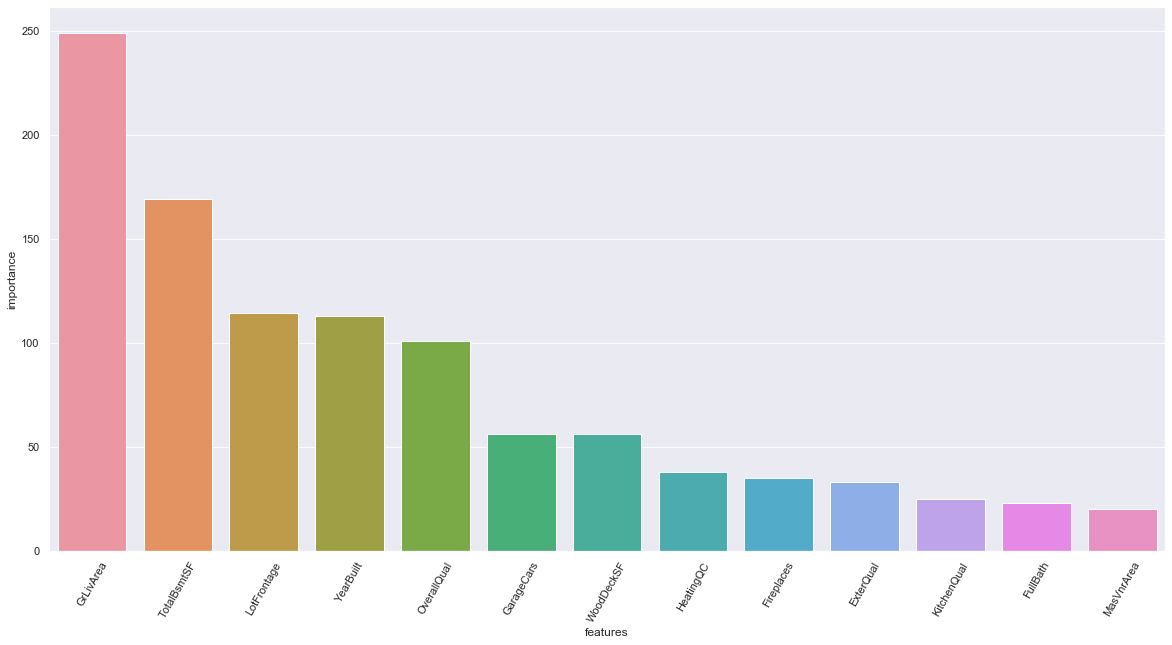

In [681]:
featureImportance = model.get_fscore()
features = pd.DataFrame()
features['features'] = featureImportance.keys()
features['importance'] = featureImportance.values()
features.sort_values(by=['importance'],ascending=False,inplace=True)
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
plt.xticks(rotation=60)
sns.barplot(data=features.head(30),x="features",y="importance",ax=ax,orient="v")

In [682]:
ypred = model.predict(dtest,ntree_limit=model.best_ntree_limit)

# Root Mean Square Error

In [683]:
from sklearn.metrics import mean_squared_error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.4528106950755195
Mean Squared Error: 0.35101857790408114
Root Mean Squared Error: 0.5924682083488372


### Inference: RMSE does not improve with XGBoost, hence our Best Model is Linear Regression with RMSE of 0.2

## Part 9 - Final Result

Report the rank, score, number of entries, for your highest rank. Include a snapshot of your best score on the leaderboard as confirmation. Be sure to provide a link to your Kaggle profile. Make sure to include a screenshot of your ranking. Make sure your profile includes your face and affiliation with SBU.

In [636]:
test_id = test['Id']
test_final= []

test_final= test.copy()
test_final = test_final.groupby(test_final.columns, axis = 1).transform(lambda x: x.fillna(x.mean()))


In [637]:
test_final= test_final[train_cols]

scaler = MinMaxScaler() 
test_final[train_cols] = scaler.fit_transform(test_final[train_cols]) 

In [638]:
test_pred = pd.DataFrame(regressor.predict(test_final))

In [639]:
submission=pd.DataFrame()
submission= pd.DataFrame(test_id.copy())

In [640]:
submission['SalePrice']=np.exp(round(test_pred,4))

Text(0.5, 0.98, 'Distribution of the Predicted Selling Price of the Test Cases')

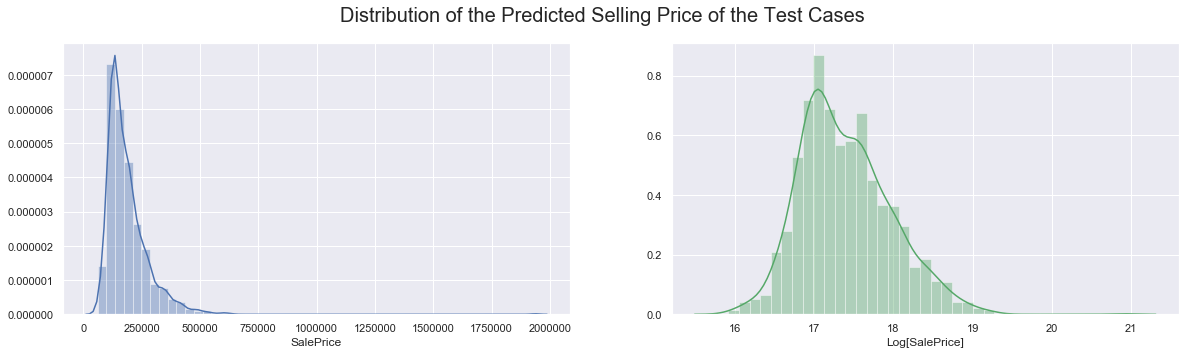

In [641]:
#histogram
fig = plt.figure(figsize= (20,5))
plt.subplot(1,2,1)
sns.distplot((submission['SalePrice']))
plt.subplot(1,2,2)
sns.distplot(np.log2(submission['SalePrice']),color="g")
plt.xlabel('Log[SalePrice]')
plt.suptitle('Distribution of the Predicted Selling Price of the Test Cases',size=20)

In [642]:
file_version= 'submission_3.csv'

In [643]:
submission.to_csv('/Users/mehar/Downloads/Stony_Brook_University/Fall2019/DataScience/house-prices-advanced-regression-techniques/Submission/'+ str(file_version), index=False)


Kaggle Link: https://www.kaggle.com/ar1994

Highest Rank: 3329

Score: 0.15

Number of entries: 3

INCLUDE IMAGE OF YOUR KAGGLE RANKING
    

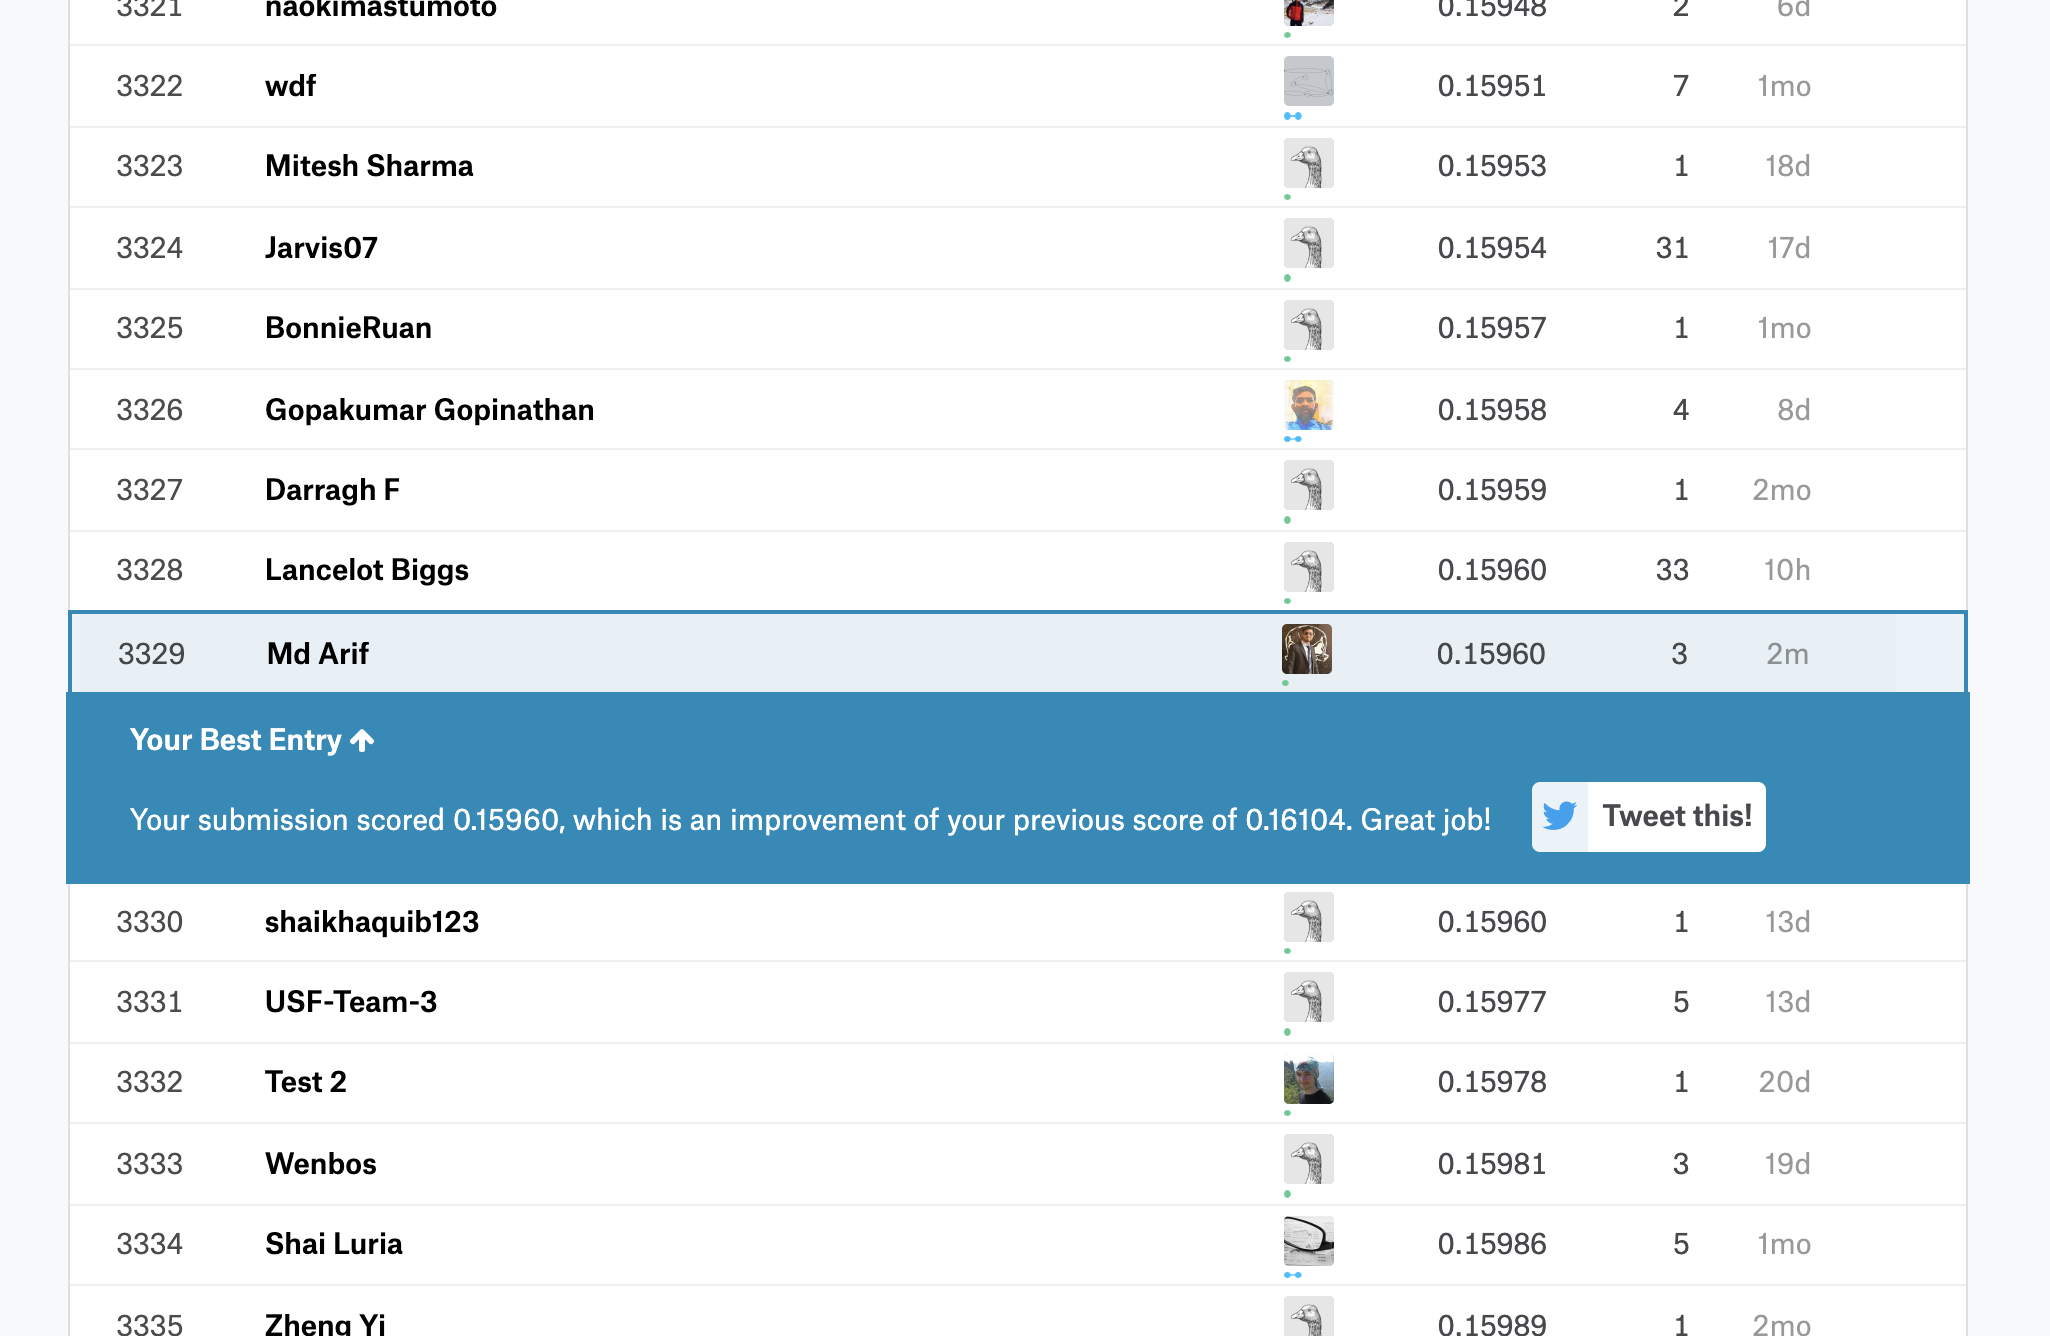

**References**

#https://towardsdatascience.com/principal-component-analysis-for-dimensionality-reduction-115a3d157bad
#https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb
#https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html